In [1]:
import pandas as pd
df=pd.read_csv('data3.csv')
df.head()

,Name,age,job,marital,education,default,balance,housing,loan,contact,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,youtcome
0,Emily,56,housemaid,married,basic.4y,no,2143,no,no,telephone,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,Madison,57,services,married,high.school,unknown,29,no,no,telephone,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,Hannah,37,services,married,high.school,no,2,yes,no,telephone,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,Emma,40,admin.,married,basic.6y,no,1506,no,no,telephone,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,Alexis,56,services,married,high.school,no,1,no,yes,telephone,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [2]:
df=df[['marital','default','loan','contact','previous','poutcome','youtcome','housing']]
df.head()

,marital,default,loan,contact,previous,poutcome,youtcome,housing
0,married,no,no,telephone,0,nonexistent,no,no
1,married,unknown,no,telephone,0,nonexistent,no,no
2,married,no,no,telephone,0,nonexistent,no,yes
3,married,no,no,telephone,0,nonexistent,no,no
4,married,no,yes,telephone,0,nonexistent,no,no


In [3]:
import numpy as np
df['marital']=np.where(df['marital']=="married",1,0)
df.head()

,marital,default,loan,contact,previous,poutcome,youtcome,housing
0,1,no,no,telephone,0,nonexistent,no,no
1,1,unknown,no,telephone,0,nonexistent,no,no
2,1,no,no,telephone,0,nonexistent,no,yes
3,1,no,no,telephone,0,nonexistent,no,no
4,1,no,yes,telephone,0,nonexistent,no,no


In [4]:
df['default']=np.where(df['default']=="no",1,0)
df.head()

,marital,default,loan,contact,previous,poutcome,youtcome,housing
0,1,1,no,telephone,0,nonexistent,no,no
1,1,0,no,telephone,0,nonexistent,no,no
2,1,1,no,telephone,0,nonexistent,no,yes
3,1,1,no,telephone,0,nonexistent,no,no
4,1,1,yes,telephone,0,nonexistent,no,no


In [5]:
df['housing']=np.where(df['housing']=="yes",1,0)
df['loan']=np.where(df['loan']=="yes",1,0)
df['contact']=np.where(df['contact']=="telephone",1,0)
df['poutcome']=np.where(df['poutcome']=="nonexistent",1,0)
df['youtcome']=np.where(df['youtcome']=="yes",1,0)
df.head()

,marital,default,loan,contact,previous,poutcome,youtcome,housing
0,1,1,0,1,0,1,0,0
1,1,0,0,1,0,1,0,0
2,1,1,0,1,0,1,0,1
3,1,1,0,1,0,1,0,0
4,1,1,1,1,0,1,0,0


In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df[['marital','default','loan','contact','previous','poutcome','youtcome']],
                                              df['housing'],test_size=0.3,random_state=100)

In [7]:
X_train.head()

,marital,default,loan,contact,previous,poutcome,youtcome
7019,1,1,0,1,0,1,0
27175,0,1,0,1,0,1,0
15817,0,1,0,0,0,1,0
40971,0,1,0,0,2,0,0
8467,1,1,0,1,0,1,0


In [8]:
X_train.isnull().sum()

marital     0
default     0
loan        0
contact     0
previous    0
poutcome    0
youtcome    0
dtype: int64

In [9]:
from sklearn.feature_selection import chi2
f_p_values=chi2(X_train,y_train)

In [10]:
f_p_values

(array([  0.67264664,   1.48543159,  92.49778237, 137.29993586,
         26.82382814,   3.50603994,   3.40094874]),
 array([4.12130388e-01, 2.22926629e-01, 6.74002621e-22, 1.03680040e-31,
        2.22872270e-07, 6.11454458e-02, 6.51589317e-02]))

In [11]:
import pandas as pd
p_values=pd.Series(f_p_values[1])
p_values.index=X_train.columns
p_values

marital     4.121304e-01
default     2.229266e-01
loan        6.740026e-22
contact     1.036800e-31
previous    2.228723e-07
poutcome    6.114545e-02
youtcome    6.515893e-02
dtype: float64

In [13]:
p_values.sort_index(ascending=False , inplace = True)

<AxesSubplot:>

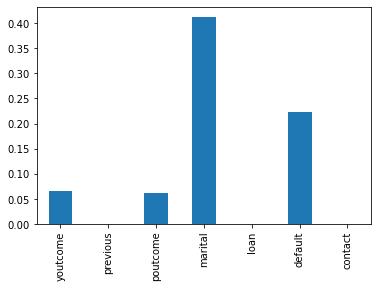

In [14]:
p_values.plot.bar()

In [18]:
p_values.sort_values(ascending=True)

contact     1.036800e-31
loan        6.740026e-22
previous    2.228723e-07
poutcome    6.114545e-02
youtcome    6.515893e-02
default     2.229266e-01
marital     4.121304e-01
dtype: float64